# Lab 4

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, ifft
from math import floor

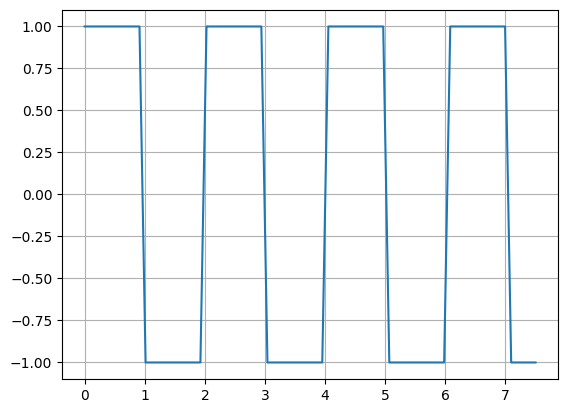

In [10]:
def exercise1() -> None:
    points_count = 75
    max_frequency = 10
    period = 1 / max_frequency

    def signal_float(x: float) -> float:
        return 1 if floor(x) % 2 == 0 else -1

    signal = np.vectorize(signal_float)

    xs = np.linspace(0, points_count * period, points_count)
    ys = signal(xs)

    # plt.subplot(221)
    plt.plot(xs, ys)
    plt.grid()

    plt.show()


exercise1()

In [ ]:
def exercise2() -> None:
    pass


exercise2()

In [ ]:
def exercise3() -> None:
    pass


exercise3()

In [ ]:
def exercise4() -> None:
    pass


exercise4()

In [ ]:
def exercise5() -> None:
    pass


exercise5()

In [ ]:
def exercise6() -> None:
    pass


exercise6()

In [ ]:
def exercise7() -> None:
    pass


exercise7()